In [20]:
from qutip import basis, mcsolve, sigmax, sigmay, sigmaz, qeye,mesolve
import numpy as np
import matplotlib.pyplot as plt

# Definimos los estados base y excitado
NF = 2
Kg = basis(NF, 1)  # estado base
Ke = basis(NF, 0)  # estado excitado

# Estado inicial en |g>
psi0 = Kg

# Operadores de proyección
Agg = Kg * Kg.dag()
Aee = Ke * Ke.dag()
Aeg = Ke * Kg.dag()
Age = Kg * Ke.dag()

# Valores esperados (opciones de seguimiento del sistema)
expect_values = [Aee, Agg]  # solo dos estados ahora

# Parámetros del sistema
Omega = 3     # Frecuencia de Rabi
g = 1     # Tasa de emisión espontánea

# Operador de colapso: solo uno para la emisión de |e> a |g>
Ceg = np.sqrt(g) * Age
collapse = [Ceg] 

# Hamiltoniano: sin términos de colapso adicionales
H = 0.5 * Omega * (Aeg + Age)





In [21]:
# Tiempo de simulación y lista de tiempo
tlist = np.linspace(0, 20, 100)

# Solución de Monte Carlo
MC1 = mcsolve(H, psi0, tlist, collapse, expect_values, ntraj=500)

10.0%. Run time:   1.22s. Est. time left: 00:00:00:10
20.0%. Run time:   2.45s. Est. time left: 00:00:00:09
30.0%. Run time:   3.70s. Est. time left: 00:00:00:08
40.0%. Run time:   4.98s. Est. time left: 00:00:00:07
50.0%. Run time:   6.24s. Est. time left: 00:00:00:06
60.0%. Run time:   7.51s. Est. time left: 00:00:00:05
70.0%. Run time:   8.80s. Est. time left: 00:00:00:03
80.0%. Run time:  10.07s. Est. time left: 00:00:00:02
90.0%. Run time:  11.33s. Est. time left: 00:00:00:01
100.0%. Run time:  12.58s. Est. time left: 00:00:00:00
Total run time:  12.61s


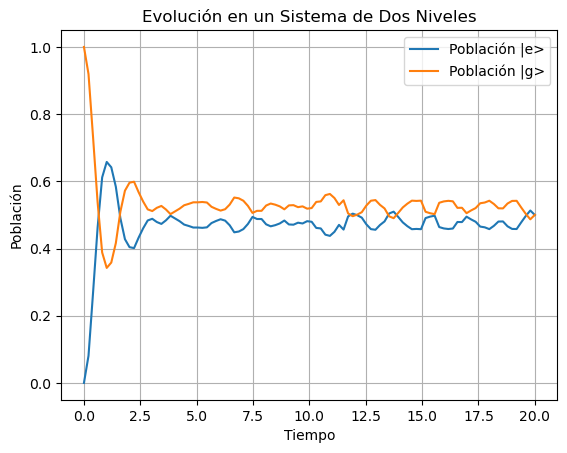

In [22]:
# Gráfica de población en estado excitado y base
plt.plot(tlist, MC1.expect[0], label=r'Población |e>')
plt.plot(tlist, MC1.expect[1], label=r'Población |g>')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.title("Evolución en un Sistema de Dos Niveles")
plt.grid(True)
plt.show()


0.3076306481098067
El primer colapso ocurrió en t = 0.31


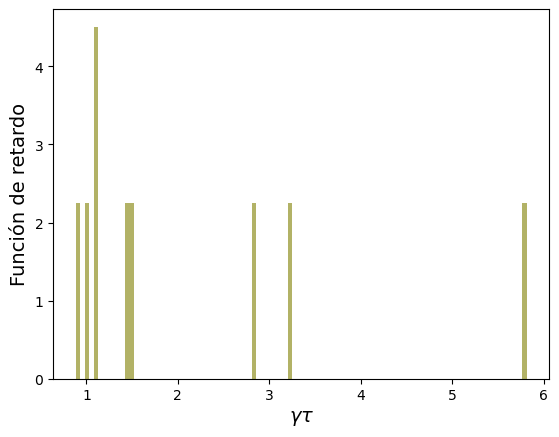

In [23]:
# Obtener los tiempos de colapso
collapse_times = MC1.col_times[0]  # La primera trayectoria


# Verificar si hubo colapsos y registrar el tiempo del primer colapso
if len(collapse_times) > 0:
    first_collapse_time = collapse_times[0]
    print(collapse_times[0])
    print(f"El primer colapso ocurrió en t = {first_collapse_time:.2f}")
else:
    print("No hubo colapsos durante la simulación.")

# Para visualizar el tiempo de espera entre colapsos (solo si hubiera más)
if len(collapse_times) > 1:
    waiting_times = np.diff(collapse_times)
    plt.hist(waiting_times, bins=100, density=True, alpha=0.6, color='olive')
    plt.xlabel(r"$\gamma \tau$", fontsize=14)
    plt.ylabel("Función de retardo", fontsize=14)
    plt.show()


19.25748534827363


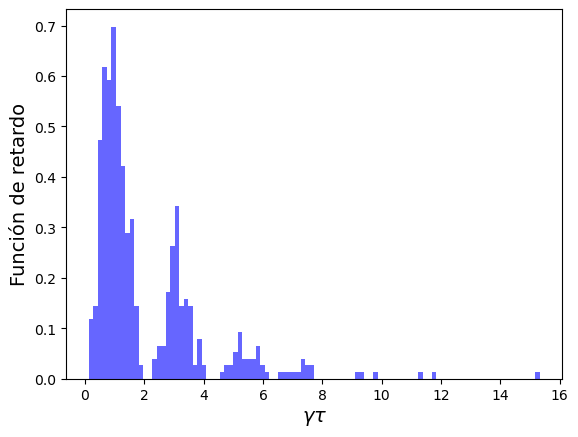

In [24]:
all_collapse_times = []
for traj in MC1.col_times:
    if len(traj) > 0:
        all_collapse_times.append(traj[0])  # Solo tomamos el primer colapso de cada trayectoria
print(max(collapse_times))
# Analiza los tiempos de espera del primer colapso
plt.hist(all_collapse_times, bins=100, density=True, alpha=0.6, color='blue')

plt.xlabel(r"$\gamma \tau$", fontsize=14)
plt.ylabel("Función de retardo", fontsize=14)
plt.show()